In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ソフトマックス回帰
ソフトマックス回帰は,複数のクラスの分類を生成するモデルである.ソフトマックス回帰のコスト関数には交差エントロピーが用いられる.このノートでは,ソフトマックス回帰を用いて,あやめの花を3つの種類に分類する.

In [2]:
df = pd.read_csv("data4.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


特徴量の意味
- sepal length (cm) : ガクの長さ
- sepal width (cm) : ガクの幅
- petal length (cm) : 花弁の長さ
- petal width (cm) : 花弁の幅
- target : 花の種類(カテゴリカル)
    - 0 : setosa(セトナ)
    - 1 : versicolor(バーシクル)
    - 2 : virginica(バージニカ)

## scikit-learnによるソフトマックス回帰

In [30]:
from sklearn.linear_model import LogisticRegression

X = df[["petal length (cm)","petal width (cm)"]] # 花弁の幅,花弁の長さを抽出10
y = df["target"]
# multi_classを設定することでソフトマックス回帰を実現する.
# C : 正則化のハイパーパラメータ
model = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
model.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

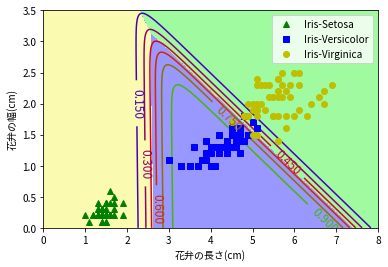

In [31]:
from matplotlib.colors import ListedColormap

plt.figure(facecolor="white")
# データセットをプロット
plt.plot(df.loc[df["target"]==0, "petal length (cm)"],df.loc[df["target"]==0, "petal width (cm)"], "g^", label="Iris-Setosa")
plt.plot(df.loc[df["target"]==1, "petal length (cm)"],df.loc[df["target"]==1, "petal width (cm)"], "bs", label="Iris-Versicolor")
plt.plot(df.loc[df["target"]==2, "petal length (cm)"],df.loc[df["target"]==2, "petal width (cm)"], "yo", label="Iris-Virginica")

# np.meshgrid : 格子列を生成
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
# np.c_ 行列の結合
# np.ravel : 行列を1次元化する
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = model.predict_proba(X_new) # 予測(確率)を計算
y_predict = model.predict(X_new) # 予測(分類)を計算

zz1 = y_proba[:, 1].reshape(x0.shape) # y_probaからIris-Versicolorの確率を抽出
zz = y_predict.reshape(x0.shape) # y_predictを1元化

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']) # カラーマップの設定

# 分類された結果ごとに塗り分け
plt.contourf(x0, x1, zz, cmap=custom_cmap) #(格子点のx座標の配列,格子点のy座標の配列,値の配列)
# 等高線の表示 
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("花弁の長さ(cm)")
plt.ylabel("花弁の幅(cm)")
plt.legend()
plt.show()